---

# Rechnernutzung in der Physik
**Institut für Experimentelle Teilchenphysik**  
Prof. G. Quast, Dr. Th. Chwalek  
WS 2024/25 – Blatt 04  
Abgabe: Mo./Di. 16./17. Dezember bzw. Di. 7. Januar / Mo. 20. Januar  
Den Montagstermin am 23.12. lassen wir ausfallen. Stattdessen richten wir am Montag, 20. Januar, zwei Zeitfenster ein: morgens 9.45 Uhr bis 11.15 Uhr im Kl. HS A, nachmittags wie gewohnt 14.00 - 15.30 Uhr im Poolraum. Am 20. Januar können Sie die Blätter 04 und 05 abgeben. 

---

---
# Aufgabe 1: Profile Likelihood <a id="Aufgabe1"></a>
---
In dieser Aufgabe schauen Sie sich ein vielleicht bereits bekanntes Beispiel aus dem Praktikum an: Der Myon-Zerfall. Das Myon hat dieselben Eigenschaften wie das Elektron, nur ist es ca. 200 Mal schwerer. Myonen entstehen beispielsweise als Zerfallsprodukte kosmischer Strahlung und können dann am Boden z. B. durch ein praktisch zeitgleiches Signal ("Koinzidenz") in mehreren Lagen von Szintillationszählern (Detektoren, die bei Teilchendurchgang Licht emittieren, das mit Photondetektoren nachgewiesen werden kann) nachgewiesen werden. Dabei zerfallen sie größtenteils gemäß dem folgenden Prozess, illustriert als "Feynman-Diagramm", bei dem das Myon in ein Elektron, ein Elektron-Antineutrino und ein Myon-Neutrino zerfällt und ein virtuelles W-Boson als "Kraftteilchen" fungiert:

<div style='text-align:center'>
<img src='MuonDecay.png' width ='75%'>
</div>

Bei physikalischen Experimenten treten häufig Störparameter auf, die für das physikalische Ergebnis irrelevant sind, aber dessen Unsicherheit beeinflussen. Die Berechnung und Analyse der Profile-Likelihood für den jeweils interessierenden physikalischen Parameter ist eine einfache Möglichkeit, die durch Störparameter verursachten Unsicherheiten zu berücksichtigen.

In der Datei *tau_mu.dat* finden Sie 150 Werte gemessener Lebensdauern von Myonen, die im oder in der Nähe eines Myondetektors gestoppt wurden. Die Zeitdifferenz zwischen dem Nachweis des einfallenden Myons und dem Eintreffen des Elektrons aus dem Zerfall ist die Messgröße. Bedingt durch das Messverfahren sind nur Zeiten zwischen $\Delta t_{min}=1.0\,\mathrm{\mu s}$ und $\Delta t_{max}=11.5\,\mathrm{\mu s}$ erfasst. Als Störparameter bei den Messungen tritt ein Untergrund aus Zufallskoinzidenzen von Signalen auf, die im Bereich von $[\Delta t_{min},\Delta t_{max}]$ als flach verteilt angenommen werden können.

In den folgenden Teilaufgaben soll die Myonenlebensdauer $\tau_{\mu}$ bestimmt werden. Sie werden dabei bemerken, wie einfach das mit dem Wissen aus der Vorlesung und der vorigen Übung ist. 

## a) Verteilungsdichte der Zeitdifferenzen

Zunächst soll die zugrunde liegende Wahrscheinlichkeitsdichte der Messdaten erstellt werden. Aus dem Aufbau der Messung ist zu entnehmen, dass die Verteilung der gemessenen Zeitdifferenzen aus der Summe einer Gleichverteilung und einer Exponentialverteilung besteht. 
* Die **Gleichverteilung** für den Untergrund aus Zufallskoinzidenzen ist durch den relativen Anteil $f_b$ an der Gesamtanzahl gemessener Zeitdifferenz als Störparameter skaliert.
* Die **Exponentialverteilung** für den Myonenzerfall ist charakterisiert durch die Myonenlebensdauer $\tau_{\mu}$ und beinhaltet die noch zu bestimmende Normierungskonstante $C_n$. Außerdem wird der Störparameter $f_b\in[0,1]$ berücksichtigt durch den Faktor $(1-f_b)$, so dass die relativen Anteile in der Summe Eins ergeben.


$$
\mathrm{PDF}(t)=C_n(1-f_b)\exp\left\{-\frac{t}{\tau_{\mu}}\right\}+\frac{f_b}{\Delta t_{max}-\Delta t_{min}}
$$

Zur Vorbereitung der Auswertung führen Sie folgende Schritte aus:
1. Implementieren Sie eine Funktion, die die Wahrscheinlichkeitsdichte ausgibt. Beachten Sie, dass die PDF auf Eins normiert sein muss. Bestimmen Sie dazu die Normierungskonstante $C_n$.
2. Implementieren Sie eine Funktion, die die NLL der PDF ausgibt, falls diejenige, die Sie in der [ersten Aufgabe](#Aufgabe1) geschrieben haben, nicht ausreichen sollte.
3. Lesen Sie die Daten aus der gegebenen Datei ein und histogrammieren Sie diese, damit Sie eine grobe Vorstellung des Problems erhalten.

In [10]:
# imports and helper functions
import numpy as np
import matplotlib.pyplot as plt

Wir benötigen für diese Studie wieder zwei der schon auf dem letzten Blatt verwendeten
Funktionen zur Berechnung der negativen log-likelihood Funktion und zur Bestimmung 
des Minimums und nlL+/-0.5, die in der Zelle unten zur Verfügung gestellt werden. 

In [ ]:
# Negative Log Likelihood function
def NLL(x, params, func, *args, **kwargs):
    """
      calculate negative log likelihood for lists of parameter values

      Args:
        x: observations
        params: array of parameter values
        func: PDF
        args, kwargs: optional parameter for PDF

      Returns:
        (array of) float: NLL of PDF given paramas array
    """       
    nlLi = np.zeros(len(params))
    for i, param in enumerate(params):
        nlLi[i] = -np.sum(np.log(func(x, param, *args, **kwargs)))
    
    return nlLi
    

def find_estimator(nlLH, par):

    # find minimum
    min_ind = np.argmin(nlLH)

    # find right of and left of minimum value for nll+0.5 
    for i in range(len(nlLH) - 1):
        if nlLH[i] >= nlLH[min_ind] + 0.5 and nlLH[i+1] < nlLH[min_ind] + 0.5:
            left_ind = i
        if nlLH[i] < nlLH[min_ind] + 0.5 and nlLH[i+1] >= nlLH[min_ind] + 0.5:
            right_ind = i

    # calculate results
    param_min = par[min_ind]
    paramd_left = np.abs(param_min - par[left_ind])
    paramd_right = np.abs(param_min - par[right_ind])
    
    return param_min, paramd_left, paramd_right


In [15]:
# --> to do: Implementieren Sie die pdf für den Myon-Zerfall.
# function signature:
#   decaypdf(t, fb=0.1, tau=2.2, dt_min=1., dt_max=11.5)
#   agruments: 
#     t: decay times, 
#     fb: background fraction
#     tau: mean lifetime
#     dt_in: minmum of decay times
#     dt_max: myximum of decay times

def decaypdf(t, fb=0.1, tau=2.2, dt_min=1., dt_max=11.5):
	"""
      arguments
		t: decay times,
		fb: background fraction
		tau: mean lifetime
		dt_in: minimum decay times
		dt_max: maximum decay times
	  returns
        PDF of both exponential and Constant Parts
    """
	# Normierung Cn bestimmen
	integral_exp = tau * (np.exp(-dt_min/tau) - np.exp(-dt_max/tau))
	C_n = 1/ integral_exp

	# Exponential- und Gelichverteilung bestimmen
	exp_part = C_n*(1-fb)*np.exp(-t/tau)
	uniform_part = fb/(dt_max-dt_min)
    
	return exp_part+uniform_part

def nll (params, t_data, dt_min, dt_max):
    tau, fb = params
    pdf_values = decaypdf(t_data, tau, fb, dt_min, dt_max)
    return -np.sum(np.log(pdf_values))

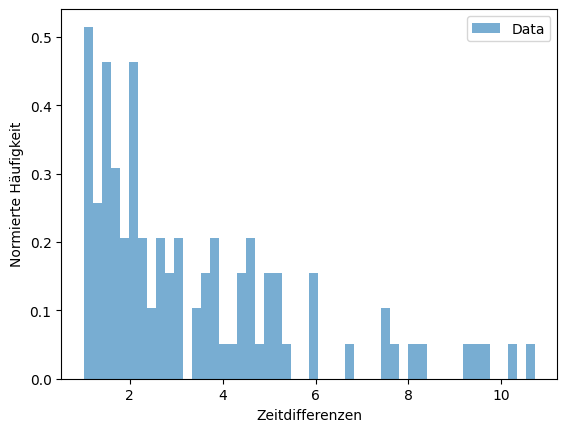

In [11]:
# -->  to do: Laden Sie die Daten aus der Datei "tau_mu.dat" und plotten Sie die Daten.

data = np.genfromtxt('tau_mu.dat')

plt.hist(data, bins=50, density=True, alpha=0.6, label ='Data')
plt.xlabel('Zeitdifferenzen')
plt.ylabel('Normierte Häufigkeit')
plt.legend()
plt.show()

## b) Bestimmung der Profile Likelihood

Zur Bestimmung der Profile Likelihood wählen Sie 200 Werte $\tau_i$ für die Lebensdauer
$\tau_{\mu}$ im Intervall zwischen $1.5\,\mu$s und $2.9\,\mu$s. Minimieren Sie für jeden Wert die NLL $-\ln L(\Delta t;\tau_i,f_b)$ bezüglich des Parameters $f_b$. Die Untergrundrate $f_b$ können Sie durch 200 Werte im Intervall $[0,0.3]$ wählen – dies entspricht einem kleinen Untergrundanteil von ca. 0-30%. <br>
Stellen Sie die Profile Likelihood geeignet dar. Zeichnen Sie ebenfalls die Linie ein, die die Abschätzung des $1\sigma$-Konfidenzintervalls zeigt.

In [ ]:
# --> to do:  Erzeugen der Profile-Likelihood für den Parameter tau,
#   d.h. für verschiedene Werte von tau wird das Minimum bzl. des Parameters fb gesucht
#
#  falls Sie keine eigene Implementerierung vorsehen, können Sie die oben angegebenen 
# Funktion NLL() zur Berechnung der Likelihood für einen Array von fbkg-Werten mutzen

# -> Arrays von Werten für tau und fb erzeugen
# -> Array mit Werten der Profle-Likelihood für die tau-Werte erzeugen
# -> Profile-Likelihood grafisch darstellen


## c) Parameterschätzung

Bestimmen Sie als letzten Schritt 
- den bestmöglichen Schätzer für die Myonenlebensdauer $\hat{\tau}_{\mu}$, 
- dessen asymmetrischen Grenzen für die Unsicherheiten $+\Delta^+,-\Delta^-$
- und den bestmöglichen Schätzer für die Untergrundrate $\hat{f}_b$ unter der Annahme $\hat{\tau}_{\mu}$.

Stellen Sie die histogrammierten Zeitdifferenzen, die Verteilung des Signals unter der Annahme der bestmöglichen Schätzer und alle Ergebnisse in einem Plot dar.

In [ ]:
# --> to do:  Profile-Likelihood auswerten 
#  Hinweis: Sie können die oben bereit gestellte Funktion find_estimator vom letzen
#   Übungsblatt verwenden, wenn Sie keine weitere eigene Implementerung machen wollen.

# -> besten Wert tau_best und Unsicherheitsintevall bestimmen
# -> für tau_best den Wert passenden Wert von fb finden. 
# -> grafische Darstellung der Daten und der angepassten Modell-Kurve


---
## Aufgabe 2: Anpassungen mit dem Paket *kafe2* <a id="Aufgabe3"></a>
---

Zur professionellen Anpassung von Modellen an Daten benötigt man einen umfangreichen 
"Werkzeugkasten", um
  - die Daten
  - und deren Unsicherheiten:
    -  entweder Poisson-Unsicherheiten oder 
    -  absolut und/oder
    -  relativ für
    Ordinate ("y -Richtung") und/oder Abszisse ("x-Richtung") sowie
  - Korrelationen der Unsicherheiten bzw. Kovarianzmatrizen

zu spezifizieren und zu verwalten und 
  - Modelle auf flexible Weise zu definieren sowie 
  - Modellparameter
    -  zu fixieren, 
    -  auf einen bestimmten Wertebereich zu begrenzen oder 
    -  statistisch korrekt auf einen Wert innerhalb von Unsicherheiten zu begrenzen. 

Außerdem sollten verschiedene Optionen vorhanden sein, um das "Abstandsmaß"
zwischen Modell und Daten (die Kostenfunktion) wählen zu können, also z.B. 
kleinste Quadrate-Methode oder verschiedene Varianten von Likelihood-Verfahren.


#### Übersicht über die Aufgabenstellung  
Zunächst knüpfen wir an die vorangegangenen Aufgaben an. Als erstes soll eine
Likelihood-Anpassung an Daten durchgeführt werden, die einem Gauß-förmigen
Signal über einem flachen Untergrund entsprechen ("ungebinnter Likelkihood-Fit").
Sie können sich als Beispiele aus der Physik z.B. ein Gamma-Spektrum vorstellen, 
also die gemessenen Energien von Gamma-Quanten, die bei einer bestimmten Energie
eine Anhäufung (Spektrallinie) zeigen, oder auch die relativistische invariante
Masse der Tochterteilchen aus dem Zerfall eines Elementarteilchens (und viele, viele 
weitere Beispiele...).

Als nächstes sollen diese Daten als Häufigkeitsverteilung (Histogramm) dargestellt
und eine Likelihood-Anpassung an das Histogramm durchgeführt werden ("gebinnter
Likelkhood Fit).

Im letzten Aufgabenteil untersuchen wir ein typisches Beispiel für die Anpassung 
von Paaren von Messwerten, für die wir einen funktionalen Zusammenhang vermuten,
eine Strom-Spannungskennlinie. Dabei treten die oben erwähnten verschiedenen Typen
von Unsicherheiten auf. Solche Problemstellungen kennen sie schon gut aus den
Praktika zur klassischen Physik.

#### Anpassungen mit kafe2
Das Paket `kafe2` erfüllt die oben genannten Kriterien und
bietet ein einfaches stand-alone Tool, *kafe2go*, zur schnellen Behandlung
vergleichsweise einfacher Probleme. Weiter gibt es Wrapper-Funktionen, die die
Ausführung von Anpassungen mit einem Funktionsaufruf ermöglichen.  
In dieser Aufgabe wollen wir aus Gründen der Flexibilität mit dem objekt-orientierten
(oo-)Interface arbeiten, das eine Reihe von Klassen mit entsprechenden Methoden enthält,
um Probleme vom oben beschriebenen Typ zu behandeln.

Dies sind zum einen Klassen, die die Daten und Unsicherheiten bereit stellen:
```python
   UnbinnedContainer
   HistContainer
   XYContainer
```

Weiter gibt es dazu passende Klassen, um Anpassungen durchzuführen. 
Diese Fit-Klassen werden mit einer Instanz einer Container-Klasse und einem Fit-Modell
instantiiert, also einer (normierten) Verteilungsdichte oder einer Modellfunktion für
den xy-Fit. Dazu gibt es eine generische Klasse `Fit`.  
Mit der Methode `Fit.add_error()` der Fit-Klasse können vor Ausführung der Anpassung 
verschiedene Typen von Unsicherheiten zur Kovarianzmatrix hinzugefügt werden.  
Für Anpassungen von Modellen sind grundsätzlich Startwerte für die Parameter notwendig,
um Lösungen in der Nähe von lokalen Minima der Kostenfunktion zu vermeiden. Dazu
dient die Methode `Fit.set_parameter_values()`, die vor Ausführung der Anpassung aufgerufen
werden muss. Es kann auch nötig sein, die anfängliche Schrittweite bei der Suche nach
dem Minimum der Kostenfunkion vorzugeben, die über die anfänglich angenommenen
Unsicherheiten der Parameter gesetzt wird. Das ist immer dann nötig ist, wenn die anfänglichen Parameterwerte nicht von der Größenordnung Eins sind. Die initialen Unsicherheiten kann man mit dem Attribut `Fit.parameter_errors` setzen.  
Die Methoden `Fit.fix_parameter()`, `Fit.limit_parameter()` und
`Fit.add_parameter_constraint()` erlauben es, Parameter im Fit festzuhalten, 
auf einen Wertebereich einzuschränken bzw. sie innerhalb von Unsicherheiten zu begrenzen.  
Die Ausführung der Anpassung erfolgt mit der Methode `Fit.do_fit()`, die ein
Python-Dictionary als Ausgabe mit allen Fit-Resultaten zurück gibt.
Die Methode `Fit.report()` liefert einen Ausdruck der Ergebnisse.

Zusätzlich gibt es Helfer-Klassen, die die grafische Darstellung, die Extraktion
von Profile-Likelihood-Kurven oder von zweidimensionalen Konfidenzkonturen ermöglichen: 
die für alle Fit-Klassen verwendbaren, generischen Klassen `Plot` und `ContoursProfiler`. 

Zur Verwendung dieser Klassen schauen Sie sich die Vorlesungsbeispiele oder
die im Unterverzeichnis *examples/* des *kafe2*-Pakets gesammelten Beispiele
sowie ggf. die 
[*kafe2*-Dokumentation](https://kafe2.readthedocs.io/en/latest/parts/user_guide.html) an.

Die typische Struktur einer Anpassung mit *kafe* unter Verwendung des
objekt-orientierten Interface sieht so aus:

```python
# --- general example of a kafe2 fit using the oo interface
# Importe

# kafe2 Datencontainer
from kafe2 import XYContainer, HistContainer, UnbinnedContainer
# generische Fit-Klasse
from kafe2 import Fit
# Hilfsklassen
from kafe2 import Plot, ContoursProfiler

import matplotlib.pyplot as plt

# Modell definieren:
def xy_model(x, a, b):
    return a*x +b 

# Daten bereit stellen
x_data = [1.0, 2.0, 3.0, 4.0]
y_data = [2.3, 4.2, 7.5, 9.4]
# absolute uncertainty for x, relative for y
x_uabs = 0.1
y_urel = 0.1

# Daten-Container aufsetzen, z.B. 
xy_data = XYContainer(x_data, y_data)

# Fit-Objekt erzeugen
xy_fit = Fit(xy_data, xy_model)

# add uncertainties here,
#   because this is the only place also for errors depending on model 
xy_fit.add_error(axis='x', err_val = x_uabs)
xy_fit.add_error(axis='y', err_val = y_urel, reference='model')

# steer fit by setting initial values and uncertainties
xy_fit.set_parameter_values(a=1, b=1)
xy_fit.parameter_errors = [0.1, 0.1]
xy_result = xy_fit.do_fit()  # perform fit

# optionally print result
xy_fit.report(asymmetric_parameter_errors=True) # use neg. log L scan to determine uncertainties

# optionally, plot results
xy_plot = Plot(xy_fit)
xy_plot.plot(asymmetric_parameter_errors=True)

# optionally, determine profile-likelihood and 2d confidence contours
cpf = ContoursProfiler(xy_fit)
# cpf.plot_profiles_contour_matrix
cpf.get_profile('a')
cpf.plot_profile('a')

plt.show()
```

Ihre eigenen Lösungen der Aufgaben unten sollten dieser Vorlage folgen. 
Sie können die Vorlage in eine code-Zelle kopieren und ausführen.

In [ ]:
# imports

# --> to do: Importe 


## Aufgabe a) Unbinned Likelihood-Fit

Eine ungebinnten Fit nutzt man immer dann, wenn die Verteilungsdichte von Daten bestimmt werden soll,
die Anzahl an Werten aber nicht ausreicht, um sinnvoll ein Histogramm darzustellen. Diese Aufgabe 
entspricht der auf dem letzten Blatt, nur soll dieses Mal *kafe2* verwendet werden. Die Daten 
werden dazu in einen *UnbinnedContainer" geladen, der mit einer Modellfunktion zur Initialisierung
einer Instanz der generischen Klasse *Fit* verwendet wird, deren Methoden dann ganz analog zur 
Vorlage oben zur Ausführung der Anpassung und Ausgabe der Ergebnisse und Grafiken angewandt 
werden. 

Als erstes werden die Daten aus der Datei *kafe2_data.csv* in einen numpy-array geladen:

In [ ]:
data = np.loadtxt('kafe2_data.csv')
#print(data)

# --> to do: Erzeugung eines Histogramms der Daten


#### Definition einer Modell-Funktion

Schreiben Sie nun eine Modellfunktion, die eine Gaußverteilung auf einem flachen Untergrund im Wertebereich
vom Minimum bis zum Maximum der eingelesenen Daten darstellt. Achten Sie darauf, dass die Verteilungsdichte
auf Eins normiert sein muss.

In [ ]:
#--> to do: Coden Sie die Modellfunktion mit der Signatur 
#   signal_plus_background(x, mu, sigma, s, min=0., max=1.)
#   """(normalized) pdf of a Gaussian signal on top of flat background"""
#   x: x-Werte der Daten
#   mu: Erwartungswert
#   sigma: Standardabweichung
#   s: Signalanteil an den Daten
#   min: Minimum der X-Werte
#   max: Maximum der x-Werte


Erzeugen Sie als nächstes die Objekte der benötigten Klassen und setzen Sie den Fit auf.
Wählen Sie vernünftige Startwerte für die Parameter und fixieren Sie die Werte für *min*
und *max* mit der Methode `Fit.fix_parameter()*. Führen Sie dann die Anpassung aus 
und erzeugen eine Ergebnis-Grafik.

In [ ]:
# --> to do: UnbinnedContainer und Fit instantiieren, Fit ausführen, Daten und Fit plotten

"""Likelihood fit to unbinned data


Als letztes erzeugen Sie eine Instanz der Klasse `Fit.ContoursProfiler` und nutzen Sie die Methode
`Fit.ContoursProfiler.get_profile()`, um die Profile-Likelihood für den Parameter *s* zu erhalten. Die Parameter sind:
`get_profile(parameter, low=None, high=None, sigma=None, cl=None, points=None, subtract_min=None)`
        
Sie können auch die Methode `Fit.ContoursProfiler.plot_profile()`verwenden, um eine grafische
Ausgabe zu erzeugen.

**Hinweis**: Bitte beachten, dass ein Wert des Parameters *s* von Null impliziert, 
dass die Paramter *mu* und *sigma* nicht definiert sind, an diesem Punkt also auch kein
Profiling möglich ist. Die Profile-Likelihood kann also erst ab einem Wert
*s* $~\gtrsim~$0.02 erstellt werden. 


In [ ]:
# --> to do:  Profile-Likelihood für den Parameter s erzeugen und anzeigen

"""Get profile likelihood from kafe2
"""


Lesen Sie die Signifikanz für die Beobachtung des Gauß-förmigen Signals aus der Profil-Likelihood ab!

to do:  Die Signifikanz beträgt ? Sigma.

## Aufgabe b) Binned histogram fit

Wenn die Datenmenge ausreichend groß ist, kann man die Anpassung direkt an ein Histogramm der
Daten vornehmen. Dazu dient die Klasse *HistContainer*  mit den Parametern
`HistContainer(n_bins=35, bin_range=(minx, maxx), fill_data=data)`.  

Die Ausführung der Anpassung und die Extraktion der Profil-Likelihood funktionieren dann ganz analog 
zur vorigen Aufgabe. Vergleichen Sie die beiden Ergebnisse für den gebinnten und den ungebinnten Fit.
Was passiert, wenn Sie sehr viele Bins verwenden, so dass am Ende nur noch null ode ein Ereignis 
in einem Bin vorhanden sind? 

**To do**: Benennen und erläutern Sie Unterschiede.  

In [ ]:
# --> to do: HistContainer und Fit instantiieren, Fit ausführen und Profile Likelihood anzeigen
"""Fitting a density distribution to a histogram 
"""

# -> Create a histogram container from the dataset, choose number of bins wisely!
# -> create the Fit object by specifying a density function
# -> Optional: create a plot and show it

"""Get profile likelihood from kafe2
"""


## Aufgabe c) Anpassung an Daten mit mehrern Typen von Unsicherheiten

In diesem Aufgabenteils soll eine Anpassung unter Berücksichtigung aller für ein 
typisches Messgerät vorhandenen absoluten und relativen Unsicherheiten durchgeführt 
werden. 
Wir betrachten dazu einen Datensatz aus je 20 gemessenen Strom- und Spannungswerten,
gemessen in den Messbereichen Spannung $U\in[0, 2]$ V und Strom $I\in[0, 200]$ mA.

Die Unsicherheiten der Messungen ergeben sich aus den Herstellerangaben:
- Jeder Messbereich umfasst eine Angabe von vier Stellen mit einer **absoluten
  Unsicherheit** von **zwei in der letzten Stelle**. Werte werden vom Messgerät im
  festen Format *x.xxx* V angezeigt;  die Unsicherheit bezieht sich auf die 
  letzte Stelle, also +/- 0.002 V. Der Strom wird im Format *xxx.x* mA angezeigt,
  die Unsicherheit ist also 0.2 mA.
- Alle Strom- und Spannungsmessungen unterliegen weiter einem **Untergrundrauschen**, 
  bei der Spannung **$\pm$20 mV** und beim Strom **$\pm$1 mA** an. 
- Zusätzlich wird eine **relative, vollständig korrelierte Unsicherheit**
  von **$\pm$5%** auf alle Messwerte angegeben, die von der Kalibrationsgenauigkeit 
  des Geräts herrührt. Die Bezugsgröße ist dabei der wahre Wert der Spannung bzw. des
  Stroms, kleine Werte haben also eine kleinere absolute Unsicherheit als größere. 
  Diese Unsicherheit betrifft Messungen in identischen Messbereichen in gleicher
  Weise und ist daher für jeweils für die Strom- und die Spannungsmessungen korreliert.
  

### Aufgabe: Durchführen der Anpassung

Implementieren Sie die Anpassung in *kafe2*, indem Sie 
- eine lineare Funktion als Modellfunktion für die Anpassung definieren,
- die Messdaten aus der *csv*-Dateil korrekt einlesen und einen *kafe2.XYContainer*
  initialisieren,
- ein *kafe2.Fit*-Objekt erzeugen und  
- alle beschriebenen Unsicherheiten korrekt mit Hilfe der Methode
  *kaf2.Fit.add_error* hinzufügen.

Beachten Sie, dass die Methode *add_error* für relative Unsicherheiten die 
Option *reference='data'/'model'* bietet. Im einen Fall werden die relativen 
Unsicherheiten durch die die gemessenen Daten bestimmt, im anderen Fall
werden sie auf die im Fit jeweils aktuellen Modellwerte bezogen.
Probieren Sie beides aus, indem Sie einfach zwei Fit-Objekte mit 
jeweils der einen oder der anderen Option aufsetzen. 

**Kommentieren** Sie den Unterschied zwischen den beiden Optionen zur Behandlung der 
relativen Unsicherheiten !

In [ ]:
# --> to do: lineares Modell definieren


In [ ]:
# --> to do: Daten aus der Datei "StromSpannungsKennlinie.csv" einlesen und graphisch darstellen


In der folgende Code-Zelle sind die angenommenen Charakteristika des Messinstruments zusammengefasst,
sozusagen als Python-Version des Datenblatts.

In [ ]:
# --- measurement device characteristics:
# accuracy current measurement: 2000 Counts, +/-(5% + 2 digits) 
#   for measuring range 200mA 
crel_I = 0.05
Idigits = 2
Icounts = 2000
Irange1 = 200.e-3
# current display accuracy (A)
sx = Idigits * Irange1 / Icounts  
# noise component:delta I = 1 mA
deltaI = 1e-3

# accuracy voltage measurement: 2000 Counts, +/-(5% + 2 digits)
#   for measuring range 2V
crel_U = 0.05
Udigits = 2
Ucounts = 2000
Urange1 = 2.
# voltage display accuracy (V)  
sy = Udigits * Urange1 / Ucounts
# noise components: delta U = 20 mV
deltaU = 20e-3


In [ ]:
# --> to do: Unsicherheiten zusammen fassen

# abs, uncorr. I
# sabsx = ...

# rel, corr. I
# crelx = ...

# abs. uncorr U
# sabsy = ...

# rel. uncorr U
# crely = ...


In [ ]:
# --> to do:  xyContainer(I,U) und Fit-Objekte erzeugen, 
#             obige Unsicherheiten hinzufügen, Fit laufen lassen und Ergebnisse plotten  
